In [1]:
# ATMS 305, Fall 2024 - Lab21: Map data #2
# Plotting data from IL tornadoes of October 2021

In [1]:
# >> A. IMPORT
# You need both matplotlib's (image and pyplot),
# Plus numpy, cartopy and pandas.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [2]:
!wget -q -N https://www.spc.noaa.gov/climo/reports/211011_rpts_filtered.gif

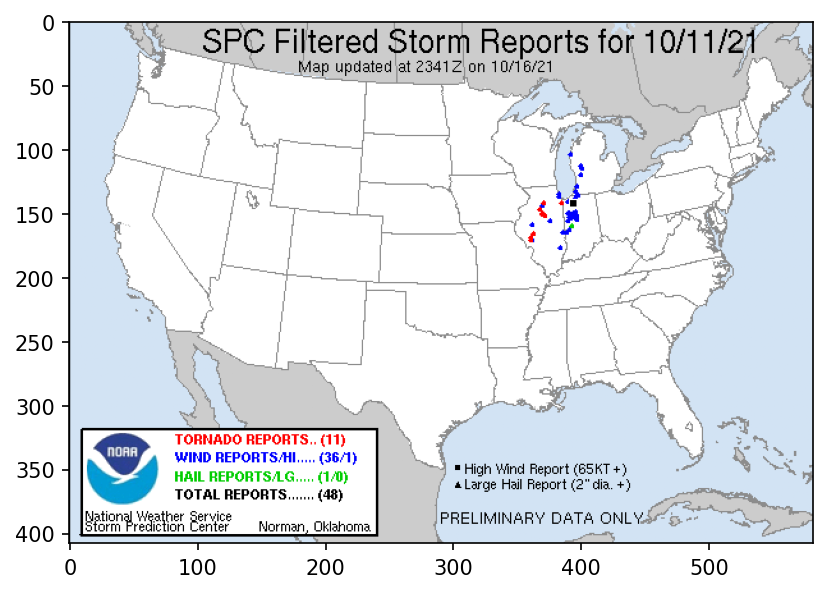

In [3]:
# >> B. STORM REPORTS (Image online)
#
# Display an archived weather image from the Storm Prediction Center.
# 1. Start a dpi=150 figure.
# 2. Open a browser tab at this page:
#        https://www.spc.noaa.gov/climo/reports/211011_rpts.html
# 3. Right- (or control-) click on the image, and get the image address.
# 4. Now - in Python - get, read-in, and show the image.
# 4. KEEP this browser tab open, you'll need it later.
gif = img.imread('211011_rpts_filtered.gif')
fig = plt.figure(dpi=150)
plt.imshow(gif)

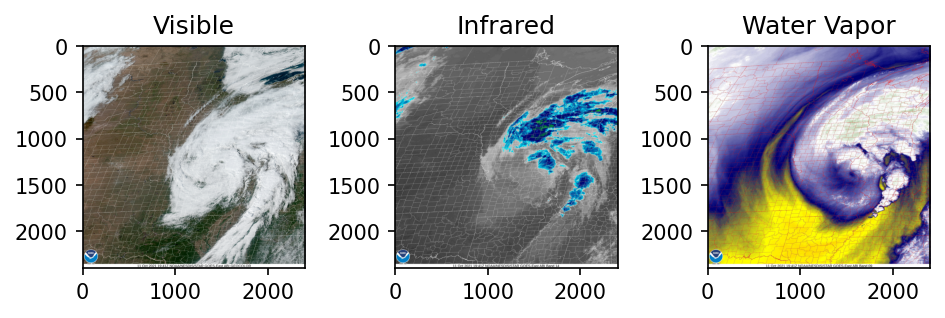

In [4]:
# >> C. SATELLITE
#
# Get, read and display satellite images near time of the first tornado.
#   1. Direct your browser to rfd.atmos.uiuc.edu/305/Data/Oct11tornadoes, and note images there.
#   2. Get the 3 images with !wget -N -q
#   3. Read the image with GEOCOLOR in the name to Python variable (array) named "visible"
#   4. Read the image with "umv-14" into variable "infrared", and "umv-09" into "vapor"
#      ..9,14 are channels: https://www.weather.gov/media/crp/GOES_16_Guides_FINALBIS.pdf
#   5. Make a new figure with dpi=150 (or higher if you wish)
#   6. Make a 3-column, 1 row table and display the 3 images in order left-to-right:
#       visible, infrared, vapor.  Put titles above: Visible, Infrared, Water Vapor
#   7. Use tight_layout() to clean up the figure.
!wget -q -N http://rfd.atmos.uiuc.edu/305/Oct11tornadoes/20212841941_GOES16-ABI-umv-09-2400x2400.jpg
!wget -q -N http://rfd.atmos.uiuc.edu/305/Oct11tornadoes/20212841941_GOES16-ABI-umv-14-2400x2400.jpg
!wget -q -N http://rfd.atmos.uiuc.edu/305/Oct11tornadoes/20212841941_GOES16-ABI-umv-GEOCOLOR-2400x2400.jpg

visible = img.imread('20212841941_GOES16-ABI-umv-GEOCOLOR-2400x2400.jpg')
infrared = img.imread('20212841941_GOES16-ABI-umv-14-2400x2400.jpg')
vapor = img.imread('20212841941_GOES16-ABI-umv-09-2400x2400.jpg')

fig = plt.figure(dpi=150)

plt.subplot(1, 3, 1)
plt.imshow(visible)
plt.title('Visible')

plt.subplot(1, 3, 2)
plt.imshow(infrared)
plt.title('Infrared')

plt.subplot(1, 3, 3)
plt.imshow(vapor)
plt.title('Water Vapor')

plt.tight_layout()

In [5]:
# >> D. GET STORM REPORTS
#
# Get and read the CSV data for the storm reports image you showed earlier.
#   1. Return to the Storm Reports web page you opened earlier.
#   2. Right-click or otherwise get the URL of the CSV link (on letters "CSV" !!)
#      found below the image (on the header line saying Tornado Reports(CSV))
#   3. Use wget to retrieve the CSV link you found.
#   4. Use Panda's read_csv() to read the data file.
#   5. Whatever you named the pandas data variable, use .head() to preview the contents.
# The UNK reflects that the tornado EF-scale rating was not yet set.
!wget -q -N https://www.spc.noaa.gov/climo/reports/211011_rpts_filtered_torn.csv
data = pd.read_csv('211011_rpts_filtered_torn.csv')
data.head()

,Time,F_Scale,Location,County,State,Lat,Lon,Comments
0,1938,UNK,WRIGHTS,GREENE,IL,39.38,-90.30,SEVERAL VIDEOS OF A TORNADO HITTING A FARM IN ...
1,1947,UNK,3 WNW ATHENSVILLE,GREENE,IL,39.48,-90.24,TORNADO ON THE GROUND WEST NORTHWEST OF ATHENS...
2,2027,UNK,2 N ALEXANDER,MORGAN,IL,39.75,-90.04,EM REPORTED TORNADO. STORM CHASER REPORTED TOR...
3,2128,UNK,3 N ROANOKE,WOODFORD,IL,40.84,-89.20,CORRECTION TO TIME. CORRECTS PREVIOUS TORNADO ...
4,2145,UNK,3 N ROANOKE,WOODFORD,IL,40.84,-89.20,BRIEFLY TOUCHED DOWN. (ILX)


In [6]:
# >> E. PRINT CSV DATA
#
# Print out some CSV data contents with a formatted print() inside a loop.
# 1. Start a loop, index named "n", in range to data.shape[0] ...
#      because if your CSV array is "data", there are data.shape[0] rows.
# 2. Inside the loop, print out your data to appear like this:
#       Report  6: Time 2145 UTC,         4 E WASHBURN, Lat 40.92, Lon -89.21
#    a) so you are printing out: (n+1), and the Time, Location, Lat and Lon.
#    b) Remember your print() syntax!!:  print(' text and %d or %s etc ' % (variable1,var2,var3) )
#       Format your print! You should allow 2 digits for the report number (so use "%2d"),
#       4 digits for time, 20 for the Location (that's %20s ... s=character string i.e. letters),
#       2 digits after the decimal point for latitude (%.2f), and same for longitude.
for n in range(data.shape[0]):
    report_num = n + 1
    time = data.loc[n, 'Time']
    location = data.loc[n, 'Location']
    lat = data.loc[n, 'Lat']
    lon = data.loc[n, 'Lon']
    
    print('Report %2d: Time %4d UTC, %20s, Lat %.2f, Lon %.2f' % (report_num, time, location, lat, lon))


Report  1: Time 1938 UTC,              WRIGHTS, Lat 39.38, Lon -90.30
Report  2: Time 1947 UTC,    3 WNW ATHENSVILLE, Lat 39.48, Lon -90.24
Report  3: Time 2027 UTC,        2 N ALEXANDER, Lat 39.75, Lon -90.04
Report  4: Time 2128 UTC,          3 N ROANOKE, Lat 40.84, Lon -89.20
Report  5: Time 2145 UTC,          3 N ROANOKE, Lat 40.84, Lon -89.20
Report  6: Time 2145 UTC,         4 E WASHBURN, Lat 40.92, Lon -89.21
Report  7: Time 2155 UTC,         4 E WASHBURN, Lat 40.92, Lon -89.21
Report  8: Time 2210 UTC,         6 E GOODENOW, Lat 41.40, Lon -87.53
Report  9: Time 2239 UTC,         2 SW EL PASO, Lat 40.72, Lon -89.04
Report 10: Time 2247 UTC,         4 SSW FLORID, Lat 41.18, Lon -89.31
Report 11: Time 2330 UTC,      3 NE TROY GROVE, Lat 41.49, Lon -89.03


Text(0.5, 1.0, 'F. Tornado locations')

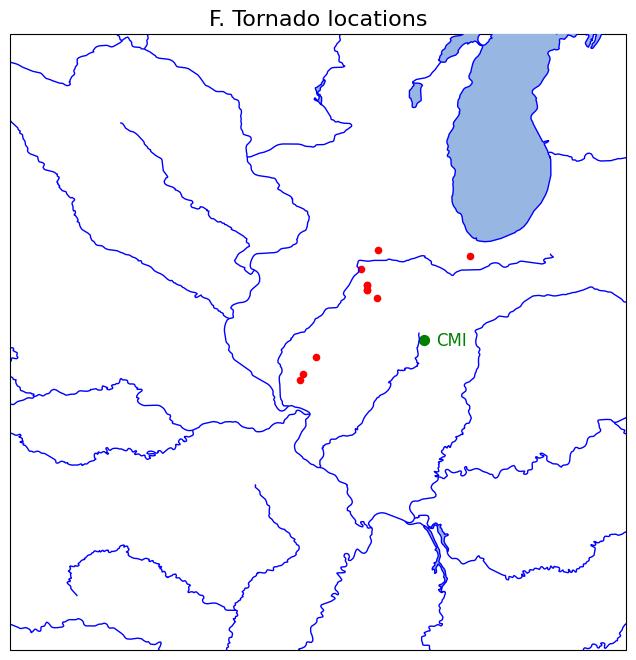

In [11]:
# >> F. TORNADO LOCATIONS
#
# Show locations of tornadoes with a dot - from scatter()
# Use a map with figsize 15x8" (adjust if you wish)
#   1. Set up a PlateCarree() map, and narrow it to a Midwest region:
#          ax.set_extent([-95, -85, 35, 45]);
#   2. You don't need BORDERS or coastlines() but do use add_feature
#        to show RIVERS and LAKES.
#   3. Do not put a background image on this plot! (that is coming up)
#   4. Make sure your lines are visible ... anything white will disappear.
#   5. Hide the weird state borders over Lake Michigan by, when displaying LAKES,
#        use alpha=1.0 and zorder=11.
#   6. Place a dot (you pick color) at Champaign (-88.277,40.039); also add text
#        label "CMI" (I added 0.2 to the longitude, and -0.1 to the latitude for CMI)
#   7. Use ax.scatter() to show the tornado locations from your CSV data.
#        Do this after noting from your earlier "data" output what the latitude
#        and longitude were named in your CSV data set.
#   8. Add a title: "F. Tornado locations"
# Step F: TORNADO LOCATIONS

fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-95, -85, 35, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.RIVERS, edgecolor='blue')
ax.add_feature(cfeature.LAKES, edgecolor='blue', alpha=1.0, zorder=11)
ax.scatter(-88.277, 40.039, color='green', s=50, transform=ccrs.PlateCarree())
ax.text(-88.277 + 0.2, 40.039 - 0.1, 'CMI', transform=ccrs.PlateCarree(), fontsize=12, color='green')
ax.scatter(data['Lon'], data['Lat'], color='red', s=20, transform=ccrs.PlateCarree())

ax.set_title('F. Tornado locations', fontsize=16)


Text(0.5, 1.0, 'G. Tornado times')

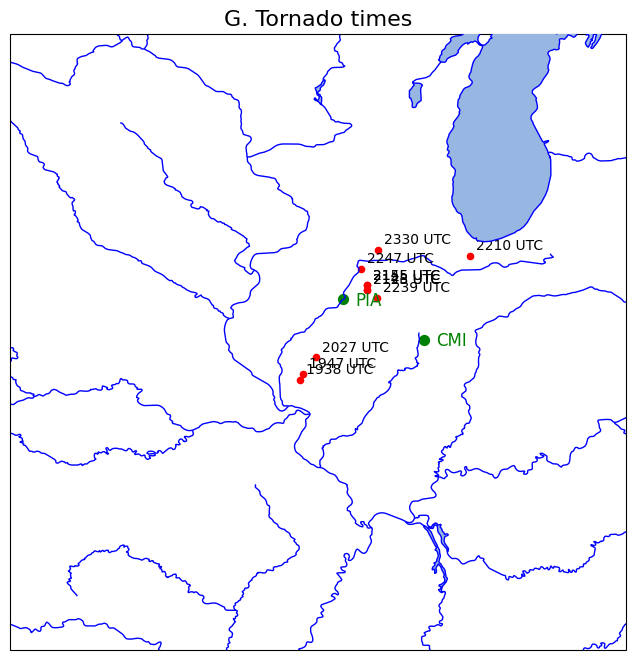

In [28]:
# >> G. TORNADO TIMES
#
# Add times of tornadoes from the CSV data
#   1. Repeat the previous cell code here, still using the same map area and figure size.
#        .. this includes lakes, rivers, dot and text at CMI, and tornado locations.
#   2. We want to add the Time part of our Pandas' data here.  We'll do this
#        with a short loop.  Look at this link and see if you can figure it out:
#     stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
#      This makes use of a for-loop with enumerate() (instead of e.g. range()) to
#        loop over all the Time values (my pd array is 'data', times are data.Time).
#      Their z() and y() are our longitude and latitude!
#   3. >> Add a dot and PIA label at Peoria.  If you know your airport codes, you
#         can use airnav to get lat/lon, i.e. do a web search for "airnav kpia" .
#   4. Add a title: G. Tornado times
# Step G: TORNADO TIMES

fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-95, -85, 35, 45], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.RIVERS, edgecolor='b')
ax.add_feature(cfeature.LAKES, edgecolor='b', alpha=1.0, zorder=11)

ax.scatter(-88.277, 40.039, color='g', s=50, transform=ccrs.PlateCarree())
ax.text(-88.277 + 0.2, 40.039 - 0.1, 'CMI', transform=ccrs.PlateCarree(), fontsize=12, color='g')
ax.scatter(data['Lon'], data['Lat'], color='r', s=20, transform=ccrs.PlateCarree())

for idx, row in data.iterrows():
    lon = row['Lon']
    lat = row['Lat']
    time = row['Time']
    time_str = f"{int(time):04d} UTC"
    ax.annotate(time_str, (lon + 0.1, lat + 0.1), color='black')

ax.scatter(-89.5890, 40.6936, color='g', s=50, transform=ccrs.PlateCarree())
ax.text(-89.5890 + 0.2, 40.6936 - 0.1, 'PIA', transform=ccrs.PlateCarree(), fontsize=12, color='g')
ax.set_title('G. Tornado times', fontsize=16)

Text(0.5, 1.0, 'H. Map, times and image')

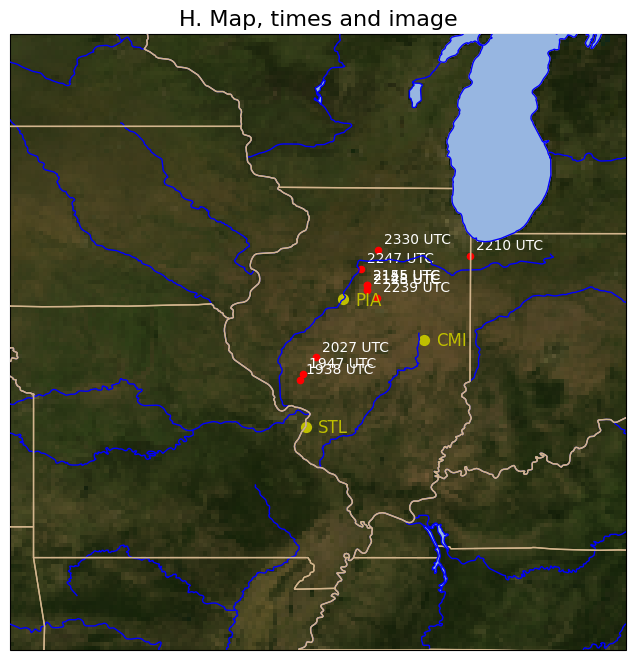

In [29]:
# >> H. ADD BACKGROUND
#
# Add a blue marble background to your map.
#   1. Repeat the previous cell code here.
#   2. >> Add a dot at St. Louis and label as STL.
#   3. Add a background.  This can be one of the lower-resolution Blue Marble
#      images or the 2-km one: your choice.  You will have to "wget -N -q" the image,
#      read it in, and imshow() it with the appropriate extent= ... as before.
#      I used: https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73801/world.topo.bathy.200409.3x5400x2700.png
#    ... so the order is now:
#      a) plt.axes (specifying PlateCarree map)
#      b) imshow (of background image, remember transform=, and extent=[-180, 180, -90, 90])
#      c) add features - RIVERS and LAKES
#      d) add states_provinces, scale='10m'
#      e) set_extent (here or elsewhere) for same region as before
#      f) add dot and text for CMI, PIA, STL
#      g) ax.scatter for red dots at tornado locations
#      h) for-loop (enumerate!) for white text showing tornado times
#   4. With the background added, black text will be hard to read.
#      Change your "ax.annotate()" to use white for the Time text color,
#      and choose something not-white for states_provinces (I used 'tan').
#   5. Add a title: H. Map, times and image

!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73801/world.topo.bathy.200409.3x5400x2700.png

fig = plt.figure(figsize=(15, 8))

ax = plt.axes(projection=ccrs.PlateCarree())
world = img.imread("world.topo.bathy.200409.3x5400x2700.png")
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

ax.add_feature(cfeature.RIVERS, edgecolor='blue', zorder=5)
ax.add_feature(cfeature.LAKES, edgecolor='blue', alpha=1.0, zorder=11)

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='tan', zorder=10)
ax.set_extent([-95, -85, 35, 45], crs=ccrs.PlateCarree())

ax.text(-88.277 + 0.2, 40.039 - 0.1, 'CMI', transform=ccrs.PlateCarree(), fontsize=12, color='y')
ax.text(-90.1994 + 0.2, 38.6270 - 0.1, 'STL', transform=ccrs.PlateCarree(), fontsize=12, color='y')
ax.text(-89.5890 + 0.2, 40.6936 - 0.1, 'PIA', transform=ccrs.PlateCarree(), fontsize=12, color='y')
ax.scatter(-88.277, 40.039, color='y', s=50, transform=ccrs.PlateCarree())
ax.scatter(-90.1994, 38.6270, color='y', s=50, transform=ccrs.PlateCarree())
ax.scatter(-89.5890, 40.6936, color='y', s=50, transform=ccrs.PlateCarree())
ax.scatter(data['Lon'], data['Lat'], color='r', s=20, transform=ccrs.PlateCarree())

for idx, row in data.iterrows():
    lon = row['Lon']
    lat = row['Lat']
    time = row['Time']
    time_str = f"{int(time):04d} UTC"
    ax.annotate(time_str, (lon + 0.1, lat + 0.1), color='w')

ax.set_title('H. Map, times and image', fontsize=16)


In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# %%shell
# jupyter nbconvert --to html  NAME